In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("ThesisConcatenatedURLs21k.csv")

In [4]:
df

,url,Label
0,https://network360005.web.app/,1
1,https://cancel626949-binance-com.firebaseapp.com/,1
2,https://sucursalbancol.sucursalbancol.repl.co/...,1
3,https://bosaa.pl:443/,1
4,http://facebook-metaplasform71.tk/,1
...,...,...
20995,https://tutsplus.com/series,0
20996,https://www.facebook.com/cnn,0
20997,https://www.summitracing.com/search/department...,0
20998,https://www.goodfinancialcents.com/peer-to-pee...,0


In [5]:
def initial_read(df):
    print('SHAPE')
    print(df.shape)
    print('=====')
    print('DTYPES')
    print(df.dtypes)
    print('=====')
    print('NULL VALUES')
    print(df.isnull().sum())
    print('=====')

In [6]:
initial_read(df)

SHAPE
(21000, 2)
=====
DTYPES
url      object
Label     int64
dtype: object
=====
NULL VALUES
url      0
Label    0
dtype: int64
=====


array([[<AxesSubplot:title={'center':'Label'}>]], dtype=object)

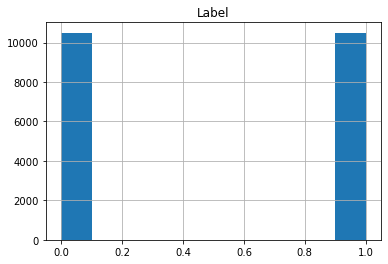

In [7]:
df.hist()

In [8]:
print(df.describe())

              Label
count  21000.000000
mean       0.500000
std        0.500012
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000


In [9]:
#plt.pie(df['Label'])
#plt.show()

# Feature Extraction

In [10]:
import urllib
from urllib.parse import urlparse, urlencode

In [11]:
urls = [url for url in df['url']] 

In [12]:
df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])


In [13]:
df

,url,Label,protocol,domain,path,query,fragment
0,https://network360005.web.app/,1,https,network360005.web.app,/,,
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,
...,...,...,...,...,...,...,...
20995,https://tutsplus.com/series,0,https,tutsplus.com,/series,,
20996,https://www.facebook.com/cnn,0,https,www.facebook.com,/cnn,,
20997,https://www.summitracing.com/search/department...,0,https,www.summitracing.com,/search/department/interior-accessories,,
20998,https://www.goodfinancialcents.com/peer-to-pee...,0,https,www.goodfinancialcents.com,/peer-to-peer-loans/,,


In [14]:
df.head(10)

,url,Label,protocol,domain,path,query,fragment
0,https://network360005.web.app/,1,https,network360005.web.app,/,,
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,
5,https://business-page-appeal-128760632.web.app...,1,https,business-page-appeal-128760632.web.app,/check.html,,
6,https://s3cur3ly-pr0t3ct10ns1t3.000webhostapp....,1,https,s3cur3ly-pr0t3ct10ns1t3.000webhostapp.com,/ctres.html,,
7,https://www.mysasjeb.asvvhey.presse.ci/index.p...,1,https,www.mysasjeb.asvvhey.presse.ci,/index.php,id=undefined,
8,https://datlogpag10.weebly.com/,1,https,datlogpag10.weebly.com,/,,
9,https://pancakeswap-finance.blog/,1,https,pancakeswap-finance.blog,/,,


In [15]:
def get_features(df):
    needed_cols = ['url', 'domain', 'path', 'query']
    for col in needed_cols:
        df[f'{col}_length']=df[col].str.len()
        df[f'Dot_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '.'))
        df[f'Slash_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '/'))
        df[f'Hypen_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '-'))
        df[f'Questionmark_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '?'))
        df[f'Equal_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '='))
        df[f'tilde_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '~'))
        df[f'And_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '&'))
        df[f'Dollar_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '$'))
        df[f'Percentage_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '%'))
        df[f'Hashtag_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '#'))
        df[f'Asterisk_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '*'))
        df[f'Plus_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '+'))
        df[f'Comma_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, ','))
        df[f'Exclamation_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '!'))
        df[f'attherate_Count_{col}'] = df[[col]].applymap(lambda x: str.count(x, '@'))
        

In [16]:
get_features(df)

In [17]:
df.head()

,url,Label,protocol,domain,path,query,fragment,url_length,Dot_Count_url,Slash_Count_url,...,tilde_Count_query,And_Count_query,Dollar_Count_query,Percentage_Count_query,Hashtag_Count_query,Asterisk_Count_query,Plus_Count_query,Comma_Count_query,Exclamation_Count_query,attherate_Count_query
0,https://network360005.web.app/,1,https,network360005.web.app,/,,,30,2,3,...,0,0,0,0,0,0,0,0,0,0
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,,49,2,3,...,0,0,0,0,0,0,0,0,0,0
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,,57,4,3,...,0,0,0,0,0,0,0,0,0,0
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,,21,1,3,...,0,0,0,0,0,0,0,0,0,0
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,,34,1,3,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.to_string()

In [19]:
df

,url,Label,protocol,domain,path,query,fragment,url_length,Dot_Count_url,Slash_Count_url,...,tilde_Count_query,And_Count_query,Dollar_Count_query,Percentage_Count_query,Hashtag_Count_query,Asterisk_Count_query,Plus_Count_query,Comma_Count_query,Exclamation_Count_query,attherate_Count_query
0,https://network360005.web.app/,1,https,network360005.web.app,/,,,30,2,3,...,0,0,0,0,0,0,0,0,0,0
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,,49,2,3,...,0,0,0,0,0,0,0,0,0,0
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,,57,4,3,...,0,0,0,0,0,0,0,0,0,0
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,,21,1,3,...,0,0,0,0,0,0,0,0,0,0
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,,34,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,https://tutsplus.com/series,0,https,tutsplus.com,/series,,,27,1,3,...,0,0,0,0,0,0,0,0,0,0
20996,https://www.facebook.com/cnn,0,https,www.facebook.com,/cnn,,,28,2,3,...,0,0,0,0,0,0,0,0,0,0
20997,https://www.summitracing.com/search/department...,0,https,www.summitracing.com,/search/department/interior-accessories,,,67,2,5,...,0,0,0,0,0,0,0,0,0,0
20998,https://www.goodfinancialcents.com/peer-to-pee...,0,https,www.goodfinancialcents.com,/peer-to-peer-loans/,,,54,2,4,...,0,0,0,0,0,0,0,0,0,0


In [20]:
import seaborn as sns
sns.__version__

'0.11.2'

In [21]:
import keras
print(keras.__version__)

2.9.0


In [22]:
pd.__version__

'1.4.2'

In [ ]:
np.__version__

In [23]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [24]:
## IP Address

In [25]:
import re
def havingIP(url):
    match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  #IPv4
                    '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  #IPv4 in hexadecimal
                    '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}',url)     #Ipv6
    if match:
        #print match.group()
        return 1
    else:
        #print 'No matching pattern found'
        return 0

In [26]:
df['Have_IP']=df['url'].apply(lambda i:  havingIP(i))

In [27]:
df

,url,Label,protocol,domain,path,query,fragment,url_length,Dot_Count_url,Slash_Count_url,...,And_Count_query,Dollar_Count_query,Percentage_Count_query,Hashtag_Count_query,Asterisk_Count_query,Plus_Count_query,Comma_Count_query,Exclamation_Count_query,attherate_Count_query,Have_IP
0,https://network360005.web.app/,1,https,network360005.web.app,/,,,30,2,3,...,0,0,0,0,0,0,0,0,0,0
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,,49,2,3,...,0,0,0,0,0,0,0,0,0,0
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,,57,4,3,...,0,0,0,0,0,0,0,0,0,0
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,,21,1,3,...,0,0,0,0,0,0,0,0,0,0
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,,34,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,https://tutsplus.com/series,0,https,tutsplus.com,/series,,,27,1,3,...,0,0,0,0,0,0,0,0,0,0
20996,https://www.facebook.com/cnn,0,https,www.facebook.com,/cnn,,,28,2,3,...,0,0,0,0,0,0,0,0,0,0
20997,https://www.summitracing.com/search/department...,0,https,www.summitracing.com,/search/department/interior-accessories,,,67,2,5,...,0,0,0,0,0,0,0,0,0,0
20998,https://www.goodfinancialcents.com/peer-to-pee...,0,https,www.goodfinancialcents.com,/peer-to-peer-loans/,,,54,2,4,...,0,0,0,0,0,0,0,0,0,0


In [28]:
## Number of subpages

In [29]:
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth
df['URL_Depth']=df['url'].apply(lambda i:  getDepth(i))
df

,url,Label,protocol,domain,path,query,fragment,url_length,Dot_Count_url,Slash_Count_url,...,Dollar_Count_query,Percentage_Count_query,Hashtag_Count_query,Asterisk_Count_query,Plus_Count_query,Comma_Count_query,Exclamation_Count_query,attherate_Count_query,Have_IP,URL_Depth
0,https://network360005.web.app/,1,https,network360005.web.app,/,,,30,2,3,...,0,0,0,0,0,0,0,0,0,0
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,,49,2,3,...,0,0,0,0,0,0,0,0,0,0
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,,57,4,3,...,0,0,0,0,0,0,0,0,0,1
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,,21,1,3,...,0,0,0,0,0,0,0,0,0,0
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,,34,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,https://tutsplus.com/series,0,https,tutsplus.com,/series,,,27,1,3,...,0,0,0,0,0,0,0,0,0,1
20996,https://www.facebook.com/cnn,0,https,www.facebook.com,/cnn,,,28,2,3,...,0,0,0,0,0,0,0,0,0,1
20997,https://www.summitracing.com/search/department...,0,https,www.summitracing.com,/search/department/interior-accessories,,,67,2,5,...,0,0,0,0,0,0,0,0,0,3
20998,https://www.goodfinancialcents.com/peer-to-pee...,0,https,www.goodfinancialcents.com,/peer-to-peer-loans/,,,54,2,4,...,0,0,0,0,0,0,0,0,0,1


In [30]:
## Checking of Redirection - '//'

In [31]:
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0
df['Redirection']=df['url'].apply(lambda i:  redirection(i))
df

,url,Label,protocol,domain,path,query,fragment,url_length,Dot_Count_url,Slash_Count_url,...,Percentage_Count_query,Hashtag_Count_query,Asterisk_Count_query,Plus_Count_query,Comma_Count_query,Exclamation_Count_query,attherate_Count_query,Have_IP,URL_Depth,Redirection
0,https://network360005.web.app/,1,https,network360005.web.app,/,,,30,2,3,...,0,0,0,0,0,0,0,0,0,0
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,,49,2,3,...,0,0,0,0,0,0,0,0,0,0
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,,57,4,3,...,0,0,0,0,0,0,0,0,1,0
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,,21,1,3,...,0,0,0,0,0,0,0,0,0,0
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,,34,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,https://tutsplus.com/series,0,https,tutsplus.com,/series,,,27,1,3,...,0,0,0,0,0,0,0,0,1,0
20996,https://www.facebook.com/cnn,0,https,www.facebook.com,/cnn,,,28,2,3,...,0,0,0,0,0,0,0,0,1,0
20997,https://www.summitracing.com/search/department...,0,https,www.summitracing.com,/search/department/interior-accessories,,,67,2,5,...,0,0,0,0,0,0,0,0,3,0
20998,https://www.goodfinancialcents.com/peer-to-pee...,0,https,www.goodfinancialcents.com,/peer-to-peer-loans/,,,54,2,4,...,0,0,0,0,0,0,0,0,1,0


In [32]:
## Existence of HTTPS in Domain

In [33]:
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0
df['https_Domain']=df['url'].apply(lambda i: httpDomain(i))
df

,url,Label,protocol,domain,path,query,fragment,url_length,Dot_Count_url,Slash_Count_url,...,Hashtag_Count_query,Asterisk_Count_query,Plus_Count_query,Comma_Count_query,Exclamation_Count_query,attherate_Count_query,Have_IP,URL_Depth,Redirection,https_Domain
0,https://network360005.web.app/,1,https,network360005.web.app,/,,,30,2,3,...,0,0,0,0,0,0,0,0,0,0
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,,49,2,3,...,0,0,0,0,0,0,0,0,0,0
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,,57,4,3,...,0,0,0,0,0,0,0,1,0,0
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,,21,1,3,...,0,0,0,0,0,0,0,0,0,0
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,,34,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,https://tutsplus.com/series,0,https,tutsplus.com,/series,,,27,1,3,...,0,0,0,0,0,0,0,1,0,0
20996,https://www.facebook.com/cnn,0,https,www.facebook.com,/cnn,,,28,2,3,...,0,0,0,0,0,0,0,1,0,0
20997,https://www.summitracing.com/search/department...,0,https,www.summitracing.com,/search/department/interior-accessories,,,67,2,5,...,0,0,0,0,0,0,0,3,0,0
20998,https://www.goodfinancialcents.com/peer-to-pee...,0,https,www.goodfinancialcents.com,/peer-to-peer-loans/,,,54,2,4,...,0,0,0,0,0,0,0,1,0,0


In [34]:
## Shortening Services Tiny URL

In [35]:
# . Checking for Shortening Services in URL (Tiny_URL)
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [36]:
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0
df['TinyURL']=df['url'].apply(lambda i: tinyURL(i))
df

,url,Label,protocol,domain,path,query,fragment,url_length,Dot_Count_url,Slash_Count_url,...,Asterisk_Count_query,Plus_Count_query,Comma_Count_query,Exclamation_Count_query,attherate_Count_query,Have_IP,URL_Depth,Redirection,https_Domain,TinyURL
0,https://network360005.web.app/,1,https,network360005.web.app,/,,,30,2,3,...,0,0,0,0,0,0,0,0,0,0
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,,49,2,3,...,0,0,0,0,0,0,0,0,0,0
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,,57,4,3,...,0,0,0,0,0,0,1,0,0,0
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,,21,1,3,...,0,0,0,0,0,0,0,0,0,0
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,,34,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,https://tutsplus.com/series,0,https,tutsplus.com,/series,,,27,1,3,...,0,0,0,0,0,0,1,0,0,0
20996,https://www.facebook.com/cnn,0,https,www.facebook.com,/cnn,,,28,2,3,...,0,0,0,0,0,0,1,0,0,0
20997,https://www.summitracing.com/search/department...,0,https,www.summitracing.com,/search/department/interior-accessories,,,67,2,5,...,0,0,0,0,0,0,3,0,0,0
20998,https://www.goodfinancialcents.com/peer-to-pee...,0,https,www.goodfinancialcents.com,/peer-to-peer-loans/,,,54,2,4,...,0,0,0,0,0,0,1,0,0,0


In [37]:
## Presence of HTTP instead of Https

In [38]:
def httppos(url):
  pos = url.rfind(':')
  if pos >= 5:
    return 0
  else:
    return 1
 
df['http/https']=df['url'].apply(lambda i:  httppos(i))
df


,url,Label,protocol,domain,path,query,fragment,url_length,Dot_Count_url,Slash_Count_url,...,Plus_Count_query,Comma_Count_query,Exclamation_Count_query,attherate_Count_query,Have_IP,URL_Depth,Redirection,https_Domain,TinyURL,http/https
0,https://network360005.web.app/,1,https,network360005.web.app,/,,,30,2,3,...,0,0,0,0,0,0,0,0,0,0
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,,49,2,3,...,0,0,0,0,0,0,0,0,0,0
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,,57,4,3,...,0,0,0,0,0,1,0,0,0,0
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,,21,1,3,...,0,0,0,0,0,0,0,0,0,0
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,,34,1,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,https://tutsplus.com/series,0,https,tutsplus.com,/series,,,27,1,3,...,0,0,0,0,0,1,0,0,0,0
20996,https://www.facebook.com/cnn,0,https,www.facebook.com,/cnn,,,28,2,3,...,0,0,0,0,0,1,0,0,0,0
20997,https://www.summitracing.com/search/department...,0,https,www.summitracing.com,/search/department/interior-accessories,,,67,2,5,...,0,0,0,0,0,3,0,0,0,0
20998,https://www.goodfinancialcents.com/peer-to-pee...,0,https,www.goodfinancialcents.com,/peer-to-peer-loans/,,,54,2,4,...,0,0,0,0,0,1,0,0,0,0


In [40]:
df.to_csv('Thesis2Extractedfeatures21k.csv', index= False)

In [40]:
# packages
import pandas as pd
from urllib.parse import urlparse,urlencode
import re
from bs4 import BeautifulSoup
import requests
import whois
import urllib.request
from datetime import datetime
import time
import socket
from urllib.error import HTTPError
from cython.parallel import prange

In [41]:
cd = None
class FeatureExtraction:
    def __init__(self):
        pass
    
    
    def statistical_report(self,url):
        hostname = url
        h = [(x.start(0), x.end(0)) for x in re.finditer('https://|http://|www.|https://www.|http://www.', hostname)]
        z = int(len(h))
        if z != 0:
            y = h[0][1]
            hostname = hostname[y:]
            h = [(x.start(0), x.end(0)) for x in re.finditer('/', hostname)]
            z = int(len(h))
            if z != 0:
                hostname = hostname[:h[0][0]]
        url_match=re.search('at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly',url)
        try:
            ip_address = socket.gethostbyname(hostname)
            ip_match=re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42',ip_address)  
        except:
            return 1

        if url_match:
            return 1
        else:
            return 0
    
    
    def web_traffic(self,url):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
        except TypeError:
            return 1
        except HTTPError:
            return 1
        rank= int(rank)
        if (rank<100000):
            return 0
        else:
            return 1
        
        
    def domain_registration_length(self,url):
        dns = 0
        try:
            domain_name = whois.whois(urlparse(url).netloc)
        except:
            dns = 1
        
        if dns == 1:
            return 1      #phishing
        else:
            expiration_date = domain_name.expiration_date
            today = time.strftime('%Y-%m-%d')
            today = datetime.strptime(today, '%Y-%m-%d')
            if expiration_date is None:
                return 1
            elif type(expiration_date) is list or type(today) is list :
                return 1     #If it is a type of list then we can't select a single value from list. So,it is regarded as suspected website  
            else:
                creation_date = domain_name.creation_date
                expiration_date = domain_name.expiration_date
                if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
                    try:
                        creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
                        expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
                    except:
                        return 1
                registration_length = abs((expiration_date - today).days)
                if registration_length / 365 <= 1:
                    return 1 #phishing
                else:
                    return 0 # legitimate
        
    
    def age_domain(self,url):
        dns = 0
        try:
            domain_name = whois.whois(urlparse(url).netloc)
        except:
            dns = 1
        
        if dns == 1:
            return 1
        else:
            creation_date = domain_name.creation_date
            expiration_date = domain_name.expiration_date
            if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
                try:
                    creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
                    expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
                except:
                    return 1
            if ((expiration_date is None) or (creation_date is None)):
                return 1
            elif ((type(expiration_date) is list) or (type(creation_date) is list)):
                return 1
            else:
                ageofdomain = abs((expiration_date - creation_date).days)
                if ((ageofdomain/30) < 6):
                    return 1
                else:
                    return 0
                
                
    def dns_record(self,url):
        dns = 0
        try:
            domain_name = whois.whois(urlparse(url).netloc)
            #rint(domain_name)
        except:
            dns = 1
        
        if dns == 1:
            return 1
        else:
            return 0
    

In [42]:
statistical_report = []
web_traffic = []
domain_registration_length = []
age_domain = []
dns_record = []

In [43]:
fe = FeatureExtraction()
rows = len(df["url"])

for i in range(0,rows):
    url=df["url"][i]
    print(i ),print(url)
    statistical_report.append(fe.statistical_report(url))
    web_traffic.append(fe.web_traffic(url))
    domain_registration_length.append(fe.domain_registration_length(url))
    age_domain.append(fe.age_domain(url))
    dns_record.append(fe.dns_record(url))

0
https://network360005.web.app/
1
https://cancel626949-binance-com.firebaseapp.com/
2
https://sucursalbancol.sucursalbancol.repl.co/index2.html
3
https://bosaa.pl:443/
4
http://facebook-metaplasform71.tk/
5
https://business-page-appeal-128760632.web.app/check.html
6
https://s3cur3ly-pr0t3ct10ns1t3.000webhostapp.com/ctres.html
7
https://www.mysasjeb.asvvhey.presse.ci/index.php?id=undefined
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
8
https://datlogpag10.weebly.com/
9
https://pancakeswap-finance.blog/
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
10
https://cn4e-69e69.web.a

In [44]:
d={'statistical_report':pd.Series(statistical_report), 'web_traffic' : pd.Series(web_traffic) ,
   'domain_registration_length':pd.Series(domain_registration_length), 'age_domain':pd.Series(age_domain), 'dns_record':pd.Series(dns_record)
   }
df=pd.DataFrame(d)
df

,statistical_report,web_traffic,domain_registration_length,age_domain,dns_record
0,0,1,1,1,0
1,0,1,1,1,1
2,0,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0
...,...,...,...,...,...
20995,0,0,1,1,0
20996,0,0,0,0,0
20997,0,0,1,1,0
20998,0,1,1,1,0


In [47]:
df.to_csv('thesis1Extractedfeatures21k.csv', index= False)

In [43]:
df

,url,Label,protocol,domain,path,query,fragment,url_length,Dot_Count_url,Slash_Count_url,...,Plus_Count_query,Comma_Count_query,Exclamation_Count_query,attherate_Count_query,Have_IP,URL_Depth,Redirection,https_Domain,TinyURL,http/https
0,https://network360005.web.app/,1,https,network360005.web.app,/,,,30,2,3,...,0,0,0,0,0,0,0,0,0,0
1,https://cancel626949-binance-com.firebaseapp.com/,1,https,cancel626949-binance-com.firebaseapp.com,/,,,49,2,3,...,0,0,0,0,0,0,0,0,0,0
2,https://sucursalbancol.sucursalbancol.repl.co/...,1,https,sucursalbancol.sucursalbancol.repl.co,/index2.html,,,57,4,3,...,0,0,0,0,0,1,0,0,0,0
3,https://bosaa.pl:443/,1,https,bosaa.pl:443,/,,,21,1,3,...,0,0,0,0,0,0,0,0,0,0
4,http://facebook-metaplasform71.tk/,1,http,facebook-metaplasform71.tk,/,,,34,1,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,https://tutsplus.com/series,0,https,tutsplus.com,/series,,,27,1,3,...,0,0,0,0,0,1,0,0,0,0
20996,https://www.facebook.com/cnn,0,https,www.facebook.com,/cnn,,,28,2,3,...,0,0,0,0,0,1,0,0,0,0
20997,https://www.summitracing.com/search/department...,0,https,www.summitracing.com,/search/department/interior-accessories,,,67,2,5,...,0,0,0,0,0,3,0,0,0,0
20998,https://www.goodfinancialcents.com/peer-to-pee...,0,https,www.goodfinancialcents.com,/peer-to-peer-loans/,,,54,2,4,...,0,0,0,0,0,1,0,0,0,0


In [45]:
df.to_excel('ThesisF1.xlsx', index=False)